In [9]:
import math
import numpy as np
from PIL import Image, ImageDraw
from PIL import ImagePath
import pandas as pd
import os
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from multiprocessing import Pool, cpu_count
import community  # Louvain algorithm package

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
features_df = pd.read_csv('extracted_features.csv', index_col='Unnamed: 0')
features_df.tail(10)

,area,perimeter,eccentricity,solidity,lbp_0,lbp_1,lbp_2,lbp_3,lbp_4,lbp_5,lbp_6,lbp_7,mean_intensity,std_intensity,label
3382,1.0,0.0,0.0,1.0,498.0,589.0,478.0,684.0,916.0,699.0,376.0,60528.0,0.076085,0.246714,ID192_A1_Regione-1.jp2-crop_slice_105/63_label...
3383,1.0,0.0,0.0,1.0,442.0,551.0,470.0,700.0,1007.0,656.0,361.0,60686.0,0.072734,0.239923,ID192_A1_Regione-1.jp2-crop_slice_105/25_label...
3384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,ID192_A1_Regione-1.jp2-crop_slice_105/61_label...
3385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,ID192_A1_Regione-1.jp2-crop_slice_105/8_label.tif
3386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,ID192_A1_Regione-1.jp2-crop_slice_105/41_label...
3387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,ID192_A1_Regione-1.jp2-crop_slice_105/1_label.tif
3388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,ID192_A1_Regione-1.jp2-crop_slice_105/24_label...
3389,1.0,0.0,0.0,1.0,953.0,1243.0,1008.0,1327.0,1700.0,1264.0,860.0,55569.0,0.155621,0.335694,ID192_A1_Regione-1.jp2-crop_slice_105/59_label...
3390,1.0,0.0,0.0,1.0,1506.0,1704.0,1269.0,1509.0,1850.0,1439.0,1107.0,52680.0,0.212058,0.380376,ID192_A1_Regione-1.jp2-crop_slice_105/21_label...
3391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,ID192_A1_Regione-1.jp2-crop_slice_105/13_label...


In [12]:
# Create an empty undirected graph
G = nx.Graph()

In [13]:
# Add nodes to the graph with node attributes from the features_df DataFrame
for index, row in features_df.iterrows():
    node_id = index  # Use the DataFrame index as the node ID
    node_attributes = row.drop('label').to_dict()  # Exclude the 'label' column for node attributes
    G.add_node(node_id, **node_attributes)


## Graph Analysis

In [14]:
# Calculate node degree (number of edges connected to each node)
node_degrees = dict(G.degree())
# node_degrees

In [15]:
from community import community_louvain

# Detect communities using Louvain method
partition = community_louvain.best_partition(G)
nx.set_node_attributes(G, partition, name='community')

In [28]:
community_graph = nx.Graph()

In [32]:
# Aggregate nodes within each community and add them to the new graph
for community_id in set(partition.values()):
    nodes_in_community = [node for node in G.nodes if G.nodes[node].get('community') == community_id]
    community_graph.add_node(community_id, size=len(nodes_in_community))
    for node in nodes_in_community:
        community_graph.add_edge(community_id, node)

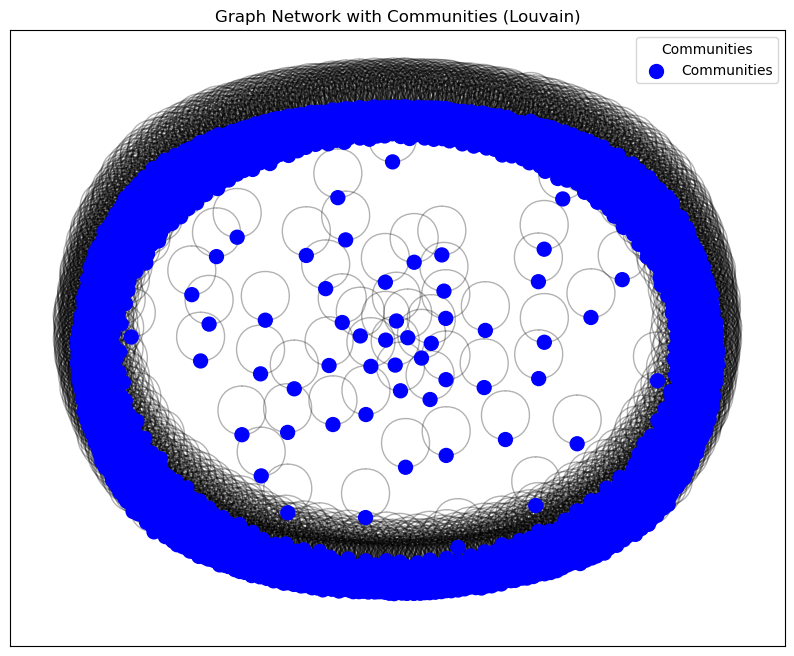

In [35]:
# Get community colors for visualization
# community_colors = [partition[node] for node in G.nodes()]

# Visualization using Matplotlib scatter plot
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
node_sizes = [community_graph.nodes[node]['size'] * 100 for node in community_graph.nodes]
nx.draw_networkx_nodes(community_graph, pos, node_color='blue', node_size=node_sizes, label='Communities')
nx.draw_networkx_edges(community_graph, pos, alpha=0.3)
plt.legend(title='Communities', loc='best')
plt.title('Graph Network with Communities (Louvain)')
# plt.axis('off')
plt.show()

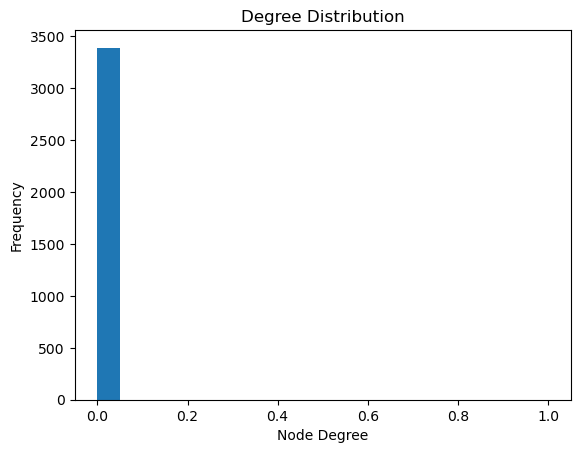

In [36]:
# Degree Distribution
degrees = dict(G.degree())
degree_values = list(degrees.values())
plt.hist(degree_values, bins=20)
plt.xlabel('Node Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()


In [37]:
# Centrality Measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Print centrality measures for the first few nodes
for node, centrality in list(degree_centrality.items())[:5]:
    print(f"Node {node}: Degree Centrality = {centrality:.4f}")


Node 0: Degree Centrality = 0.0003
Node 1: Degree Centrality = 0.0000
Node 2: Degree Centrality = 0.0000
Node 3: Degree Centrality = 0.0000
Node 4: Degree Centrality = 0.0000


In [38]:
# Clustering Coefficient
clustering_coefficient = nx.clustering(G)

# Print clustering coefficient for the first few nodes
for node, coefficient in list(clustering_coefficient.items())[:5]:
    print(f"Node {node}: Clustering Coefficient = {coefficient:.4f}")


Node 0: Clustering Coefficient = 0.0000
Node 1: Clustering Coefficient = 0.0000
Node 2: Clustering Coefficient = 0.0000
Node 3: Clustering Coefficient = 0.0000
Node 4: Clustering Coefficient = 0.0000


In [39]:
# Shortest Paths
# For example, find the shortest path between nodes 0 and 10
shortest_path = nx.shortest_path(G, source=0, target=20)
print("Shortest Path between nodes 0 and 10:", shortest_path)


NetworkXNoPath: No path between 0 and 20.

In [40]:
# Connected Components
connected_components = nx.connected_components(G)

# Example: Print the size of the largest connected component
largest_component = max(connected_components, key=len)
print("Size of the Largest Connected Component:", len(largest_component))


Size of the Largest Connected Component: 2


In [41]:
# Girvan-Newman Community Detection
# Note: Girvan-Newman is computationally expensive and may be slow for large graphs.
communities = list(nx.community.girvan_newman(G))

# Print the communities detected by Girvan-Newman
for i, community in enumerate(communities, start=1):
    print(f"Community {i}: {community}")


Community 1: ({0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8}, {9}, {10}, {11}, {12}, {13}, {14}, {15}, {16}, {17}, {18}, {19}, {20}, {21}, {22}, {23}, {24}, {25}, {26}, {27}, {28}, {29}, {30}, {31}, {32}, {33}, {34}, {35}, {36}, {37}, {38}, {39}, {40}, {41}, {42}, {43}, {44}, {45}, {46}, {47}, {48}, {49}, {50}, {51}, {52}, {53}, {54}, {55}, {56}, {57}, {58}, {59}, {60}, {61}, {62}, {63}, {64}, {65}, {66}, {67}, {68}, {69}, {70}, {71}, {72}, {73}, {74}, {75}, {76}, {77}, {78}, {79}, {80}, {81}, {82}, {83}, {84}, {85}, {86}, {87}, {88}, {89}, {90}, {91}, {92}, {93}, {94}, {95}, {96}, {97}, {98}, {99}, {100}, {101}, {102}, {103}, {104}, {105}, {106}, {107}, {108}, {109}, {110}, {111}, {112}, {113}, {114}, {115}, {116}, {117}, {118}, {119}, {120}, {121}, {122}, {123}, {124}, {125}, {126}, {127}, {128}, {129}, {130}, {131}, {132}, {133}, {134}, {135}, {136}, {137}, {138}, {139}, {140}, {141}, {142}, {143}, {144}, {145}, {146}, {147}, {148}, {149}, {150}, {151}, {152}, {153}, {154}, {155}, {156

### Create a graph data structure to represent the cell network

In [ ]:
protein_data = pd.concat(list(extract_protein_information(mask_dir, batch_size=64, min_area_threshold=50)))
cell_network_graph = create_cell_network_graph(protein_data)
print(cell_network_graph)

In [ ]:
# Visualization of the cell_network_graph
pos = nx.get_node_attributes(cell_network_graph, 'centroid')  # Get positions of nodes

node_sizes = [data['area'] for node, data in cell_network_graph.nodes(data=True)]
nx.draw_networkx_nodes(cell_network_graph, pos, node_size=node_sizes, node_color='skyblue', alpha=0.7)

nx.draw_networkx_edges(cell_network_graph, pos, edge_color='gray', alpha=0.5)
labels = {node: str(node) for node in cell_network_graph.nodes()}
nx.draw_networkx_labels(cell_network_graph, pos, labels, font_size=8, font_color='black')

# Set plot properties
plt.title("Cell Network Graph Visualization")
plt.axis('off')
plt.show()

# Network Analysis using Louvain Algorithm

In [ ]:
from community import community_louvain
# import community as community_louvain  # Louvain algorithm package

partition = community_louvain.best_partition(cell_network_graph)

# Use NetworkX library to implement the Louvain algorithm for community detection
# Partition the cell network into communities (protein complexes)
# Analyze the communities to identify important nodes and pathways
# Analyze the communities

communities = {}
for node, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = []
    communities[community_id].append(node)

# Print the communities
print(f"Identified Communities (Protein Complexes): {len(communities)}")


# Network Visualization


#### Use NetworkX or other libraries like Matplotlib or Plotly to visualize the cell network
#### Visualize protein complexes as separate subgraphs or colors for better understanding


In [ ]:
import threading

# Get the number of protein complexes (communities)
num_communities = max(partition.values()) + 1

# Separate protein complexes into subgraphs based on community IDs
def _separate_protein_complexes(community_id):
    protein_complexes.append(cell_network_graph.subgraph([node for node in cell_network_graph.nodes if partition[node] == community_id]))

num_threads = 4
protein_complexes = []
threads = []

for community_id in tqdm(range(num_communities)):
    thread = threading.Thread(target=_separate_protein_complexes, args=(community_id,))
    thread.start()
    threads.append(thread)

for thread in threads:
    thread.join()


In [ ]:

def filter_nodes_by_degree(graph, threshold=50):
    degree_centrality = nx.degree_centrality(graph)
    important_nodes = {node for node, centrality in degree_centrality.items() if centrality > threshold}
    return important_nodes

def create_subgraph_for_community(graph, community_id):
    return graph.subgraph([node for node in graph.nodes if partition[node] == community_id])

def limit_cells_to_display(graph, num_cells_to_display):
    return sorted(graph.nodes(), key=lambda x: nx.degree(graph, x), reverse=True)[:num_cells_to_display]

def edge_bundling_edges(graph, cells_to_display):
    return [(u, v) for u, v in graph.edges() if u in cells_to_display and v in cells_to_display]

def get_node_sizes(graph, cells_to_display, important_nodes):
    node_sizes = []
    for node in cells_to_display:
        if node in important_nodes:
            node_data = graph.nodes[node]
            node_sizes.append(node_data['area'])
        else:
            node_sizes.append(30)  # A fixed size for non-important nodes
    return node_sizes


In [ ]:
# Function to visualize the cell network graph
def visualize_cell_network_graph(graph, cells_to_display, important_nodes, pos):
    node_sizes = get_node_sizes(graph, cells_to_display, important_nodes)

    nx.draw_networkx_nodes(graph, pos, nodelist=cells_to_display, node_size=node_sizes, node_color='skyblue', alpha=0.7)
    non_important_nodes_list = [node for node in cells_to_display if node not in important_nodes]
    nx.draw_networkx_nodes(graph, pos, nodelist=non_important_nodes_list, node_size=30, node_color='gray', alpha=0.7)

    edges = list(graph.edges)
    edge_positions = np.array([(pos[u], pos[v]) for u, v in edges], dtype='f')
    
    try:
        lc = LineCollection(edge_positions, colors='gray', linewidths=0.5, alpha=0.5)
        plt.gca().add_collection(lc)
    except NameError as e:
        print(f"{e}")

    plt.title("Cell Network Graph Visualization")
    plt.axis('off')
    plt.show()


In [ ]:
import networkx as nx
import plotly.graph_objects as go

from concurrent.futures import ThreadPoolExecutor

def visualize_protein_complexes(cell_network_graph, protein_complexes, pos):
    num_communities = len(protein_complexes)
    colors = plt.cm.get_cmap('tab20', num_communities)

    fig = go.Figure()

    def visualize_complex(protein_complex, i):
        # Extract nodes and edges of the protein complex from the main graph
        nodes = [node for node in protein_complex.nodes() if node in cell_network_graph]
        edges = [edge for edge in cell_network_graph.edges() if edge[0] in nodes and edge[1] in nodes]

        # Create a subgraph for the protein complex
        complex_subgraph = nx.Graph()
        complex_subgraph.add_nodes_from(nodes)
        complex_subgraph.add_edges_from(edges)

        # Get positions of nodes in the subgraph
        complex_pos = {node: pos[node] for node in nodes}

        # Create a scatter plot for the nodes
        node_trace = go.Scatter(x=[], y=[], mode='markers', marker=dict(size=10, color=colors(i)))
        for node, (x, y) in complex_pos.items():
            node_trace['x'] += tuple([x])
            node_trace['y'] += tuple([y])
        fig.add_trace(node_trace)

        # Create a line plot for the edges
        edge_trace = go.Scatter(x=[], y=[], mode='lines')
        for u, v in complex_subgraph.edges():
            edge_trace['x'] += tuple([complex_pos[u][0], complex_pos[v][0], None])
            edge_trace['y'] += tuple([complex_pos[u][1], complex_pos[v][1], None])
        fig.add_trace(edge_trace)

    # Create a ThreadPoolExecutor to process the visualization of protein complexes in parallel
    with ThreadPoolExecutor() as executor:
        futures = [executor.submit(visualize_complex, protein_complex, i) for i, protein_complex in enumerate(protein_complexes)]
        for future in tqdm.tqdm(futures, total=len(futures)):
            future.result()

    # Set plot layout properties
    fig.update_layout(title_text="Protein Complexes Visualization", showlegend=False, xaxis=dict(showticklabels=False), yaxis=dict(showticklabels=False))
    fig.show()



In [ ]:

important_nodes = filter_nodes_by_degree(cell_network_graph, 50)
cells_to_display = limit_cells_to_display(cell_network_graph, 100)
pos = nx.get_node_attributes(cell_network_graph, 'centroid')


In [ ]:
visualize_cell_network_graph(cell_network_graph, cells_to_display, important_nodes, pos)

In [ ]:
from matplotlib.collections import LineCollection
visualize_cell_network_graph(cell_network_graph, cells_to_display, important_nodes, pos)

In [ ]:

visualize_protein_complexes(cell_network_graph, protein_complexes, pos)


In [ ]:
import tqdm
import concurrent.futures

def _get_cells_to_display():
    return cells_to_display

def draw_cell_network_with_protein_complexes(graph, partition, protein_complexes, num_cells_to_display, node_degree_threshold):
    
    # Get node sizes based on importance
    node_sizes = get_node_sizes(graph, cells_to_display, important_nodes)
    
    # Create subplots for main graph and protein complexes
    fig = make_subplots(rows=1, cols=2, subplot_titles=["Cell Network Graph", "Protein Complexes"])
    
    # Draw important nodes with their area as node size and color based on communities
    important_node_colors = [partition[node] for node in cells_to_display if node in important_nodes]
    
    # Create a function to iterate over the cells to display
    cells_to_display_function = _get_cells_to_display
    
    # Draw nodes and edges using multithreading
    with concurrent.futures.ThreadPoolExecutor() as executor:
        node_trace = go.Scatter(x=[], y=[], mode='markers', text=[], marker=dict(size=node_sizes, color=important_node_colors, colorscale='viridis', colorbar=dict(title='Community')))
        futures = [executor.submit(draw_node, node, node_trace) for node in tqdm.tqdm(cells_to_display_function())]
        concurrent.futures.wait(futures)
        
    fig.add_trace(node_trace, row=1, col=1)

    # Draw protein complexes as subgraphs with distinct colors
    colors = plt.cm.get_cmap('tab20', len(protein_complexes))
    for i, protein_complex in enumerate(protein_complexes):
        complex_x, complex_y = zip(*[pos[node] for node in protein_complex.nodes()])
        complex_trace = go.Scatter(x=complex_x, y=complex_y, mode='markers', marker=dict(size=10, color=[colors(i)]))
        fig.add_trace(complex_trace, row=1, col=2)

    # Set axis properties
    fig.update_xaxes(showticklabels=False, showgrid=False, zeroline=False, row=1, col=1)
    fig.update_yaxes(showticklabels=False, showgrid=False, zeroline=False, row=1, col=1)
    fig.update_xaxes(showticklabels=False, showgrid=False, zeroline=False, row=1, col=2)
    fig.update_yaxes(showticklabels=False, showgrid=False, zeroline=False, row=1, col=2)

    # Set layout properties
    fig.update_layout(title_text="Cell Network Graph with Protein Complexes (Limited Cells)", showlegend=False)
    fig.show()

def draw_node(node, node_trace):
    x, y = pos[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])


draw_cell_network_with_protein_complexes(cell_network_graph, partition, protein_complexes, num_cells_to_display=50, node_degree_threshold=0.05)


In [ ]:
import os
import networkx as nx
from PIL import Image
import numpy as np
from skimage.measure import label, regionprops

# Function to create the cell network graph
def create_cell_network_graph(image_path, mask_path, min_area_threshold=100, edge_threshold=0.05):
    # Load the image and mask
    img = Image.open(image_path)
    mask = Image.open(mask_path)

    # Convert the mask to a NumPy array
    mask_array = np.array(mask)

    # Segment cells from the mask and calculate region properties
    labeled_cells = label(mask_array)
    cell_properties = regionprops(labeled_cells)

    # Create a graph
    cell_network_graph = nx.Graph()

    # Dictionary to store centroid coordinates of nodes
    centroid_dict = {}

    # Add nodes (cells) to the graph
    for cell in cell_properties:
        if cell.area >= min_area_threshold:
            # Generate a unique node label as an integer
            node_label = cell.label
            cell_network_graph.add_node(node_label, area=cell.area)
            centroid_dict[node_label] = cell.centroid

    # Calculate pairwise distances between centroids
    num_cells = len(centroid_dict)
    centroids = np.array(list(centroid_dict.values()))
    distances = euclidean_distances(centroids, centroids)

    # Add edges (interactions) to the graph based on distance threshold
    for u, centroid_u in centroid_dict.items():
        for v, centroid_v in centroid_dict.items():
            if u != v and distances[u - 1, v - 1] <= edge_threshold:
                cell_network_graph.add_edge(u, v)

    # Print some graph information for debugging
    print("Number of nodes:", cell_network_graph.number_of_nodes())
    print("Number of edges:", cell_network_graph.number_of_edges())

    return cell_network_graph


In [ ]:
# Create the cell network graph
image_path = 'test_image/1-scimpanze-1dx-2sx_1_slice_4.png'
mask_path = 'test_image/1-scimpanze-1dx-2sx_1_slice_4_bwmask.png'


cell_network_graph = create_cell_network_graph1(image_path, mask_path)

In [ ]:
# Evaluate the cell network graph
def evaluate_cell_network_graph(graph):
    # Check if the graph has any edges
    if graph.number_of_edges() == 0:
        raise ValueError("The graph has no edges, and the modularity is undefined.")
        
    # Calculate modularity using Louvain algorithm for community detection
    partition = community.best_partition(graph)
    modularity = community.modularity(partition, graph)

    # Calculate overall connectivity and density
    connectivity = graph.number_of_edges()
    density = nx.density(graph)

    # Calculate robustness by simulating node removal
    num_nodes_removed = 10
    removed_nodes = np.random.choice(list(graph.nodes()), num_nodes_removed, replace=False)
    robustness = 0
    for node in removed_nodes:
        temp_graph = graph.copy()
        temp_graph.remove_node(node)
        if nx.is_connected(temp_graph):
            robustness += 1
    robustness /= num_nodes_removed

    # Calculate average path length and diameter
    avg_path_length = nx.average_shortest_path_length(graph)
    diameter = nx.diameter(graph)

    # Calculate clustering coefficient
    clustering_coefficient = nx.average_clustering(graph)

    return modularity, connectivity, density, robustness, avg_path_length, diameter, clustering_coefficient

In [ ]:

# Evaluate the cell network graph
modularity, connectivity, density, robustness, avg_path_length, diameter, clustering_coefficient = evaluate_cell_network_graph(cell_network_graph)

# Print the evaluation results
print("Modularity:", modularity)
print("Connectivity:", connectivity)
print("Density:", density)
print("Robustness:", robustness)
print("Average Path Length:", avg_path_length)
print("Diameter:", diameter)
print("Clustering Coefficient:", clustering_coefficient)